<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Hometask_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [3]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [4]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [5]:
# ваш код здесь
ratings = ratings.drop(index='user')

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

In [6]:
ratings.shape

(1000, 5000)

Заполните пропуски нулями.

In [7]:
# ваш код здесь
ratings = ratings.fillna(0)

Нормализуйте данные при помощи `normalize`.

In [8]:
from sklearn.preprocessing import normalize

# ваш код здесь
ratings_norm = normalize(ratings)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [9]:
from sklearn.cluster import KMeans

# ваш код здесь
kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings_norm)
labels = kmeans.predict(ratings_norm)

Выведите на экран центры кластеров (центроиды)

In [10]:
# ваш код здесь

centroids = kmeans.cluster_centers_
print(centroids)

[[ 8.60069357e-04  2.80510240e-03  3.56301016e-03 ... -2.16840434e-19
   1.59405070e-03  7.26428448e-03]
 [ 2.79182294e-03  5.18046503e-04  1.99679493e-04 ...  6.50521303e-19
   3.04482514e-03 -1.08420217e-18]
 [ 1.09952760e-03  1.50073407e-03  1.45734728e-03 ...  3.60810921e-03
   5.05673852e-04  1.11776720e-03]
 [ 1.53060694e-03 -6.50521303e-19  9.58003763e-05 ...  1.13590057e-03
   0.00000000e+00  8.41105352e-04]
 [ 2.27546870e-03  4.33680869e-19  1.17430173e-03 ...  9.13419875e-04
   3.44041794e-03  5.93913191e-04]]


Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [11]:
from scipy import spatial

# ваш код здесь

# Получаем индексы строк, т.к. normalize убил индексы
beatles_idx = ratings.index.get_loc("the beatles")
coldplay_idx = ratings.index.get_loc("coldplay")

cosine_distance = spatial.distance.cosine(ratings_norm[beatles_idx], ratings_norm[coldplay_idx])

print(f"Косинусное расстояние между 'the beatles' и 'coldplay': {cosine_distance:.2f}")


Косинусное расстояние между 'the beatles' и 'coldplay': 0.90


Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [12]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [13]:
# ваш код здесь
for i, center in enumerate(centroids):
    top_10_indices = pClosest(ratings_norm, center, 10)
    top_10_artists = ratings.index[top_10_indices].to_list()
    print(f"Топ-10 исполнителей для центроида {i}:\n{top_10_artists}")


Топ-10 исполнителей для центроида 0:
['the arcade fire', 'sufjan stevens', 'radiohead', 'broken social scene', 'the shins', 'belle and sebastian', 'animal collective', 'of montreal', 'beirut', 'deathcab for cutie']
Топ-10 исполнителей для центроида 1:
['nas', 'a tribe called quest', "the roots featuring d'angelo", 'jay-z', 'gangstarr', 'de la soul', 'murs and 9th wonder', 'mos def', 'lupe the gorilla', 'wu-tang clan']
Топ-10 исполнителей для центроида 2:
['the beatles', 'the rolling stones', 'radiohead', 'dylan. bob', 'the clash', 'led zeppelin.', 'velvet underground', 'r.e.m.', 'white stripes', 'the pixies']
Топ-10 исполнителей для центроида 3:
['kelly clarkson', 'rihanna & jay-z', 'the pussycat dolls', 'mariah carey', 'maroon5', 'beyoncé', 'alicia keys', 'leona lewis', 'chris brown', 'justin timberlake']
Топ-10 исполнителей для центроида 4:
['fall out boy', 'blink-182', 'brand new', 'taking back sunday', 'new found glory', 'saosin', 'the used', 'cartel', 'chiodos', 'paramore']


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

Правильный ответ:
- Кластеры выделяются неплохо, но с погрешностями (жанры иногда плохо угадываются)
- Кластеры осмысленные (каждый кластер можно отнести к некоторому музыкальному жанру)

# Часть 2: сравнение алгоритмов кластеризации

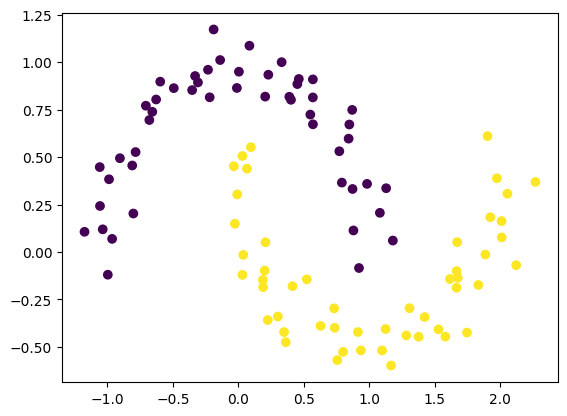

In [14]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

Время работы KMeans: 0.0023 секунд


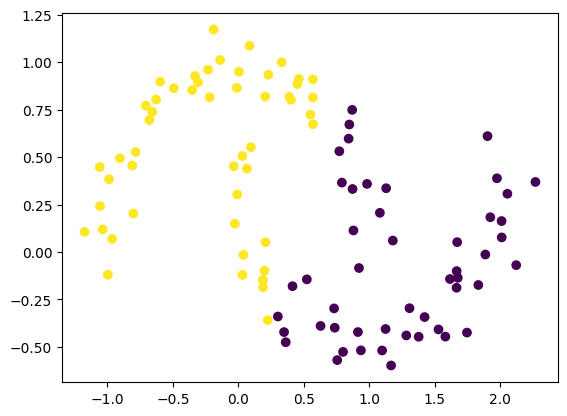

In [15]:
# ваш код здесь
import time

kmeans = KMeans(n_clusters=2)
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
labels = kmeans.predict(X)
KMeans_time = end_time - start_time
print(f"Время работы KMeans: {KMeans_time:.4f} секунд")

plt.scatter(X[:,0], X[:,1], c=labels)


## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

**Ответ: eps=0.28, min_samples=5**

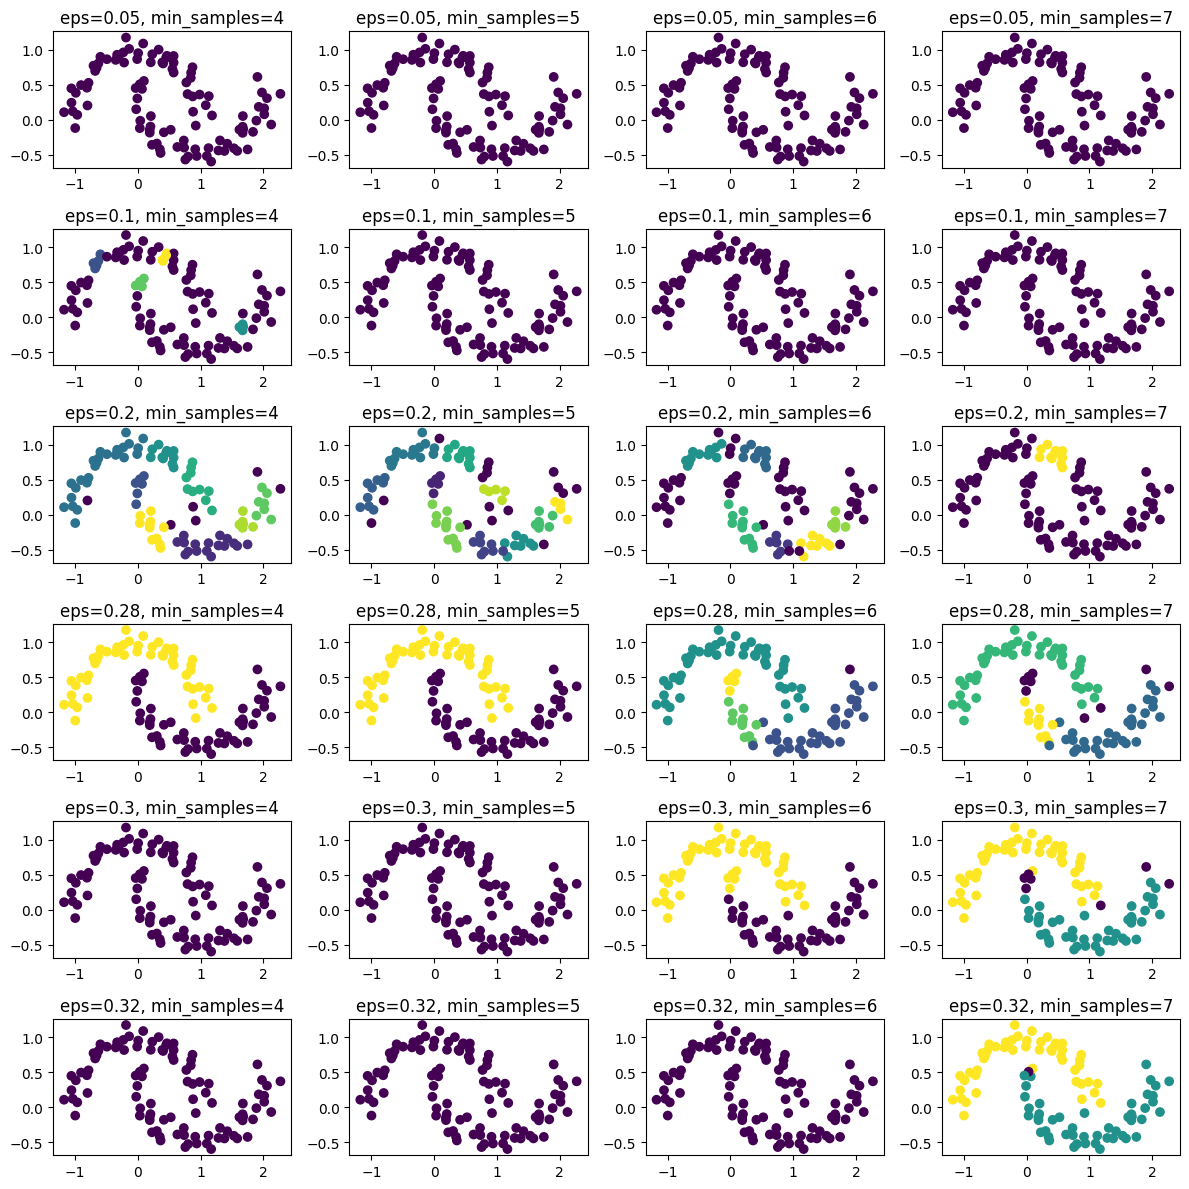

In [16]:
# ваш код здесь
from sklearn.cluster import DBSCAN
import numpy as np

# Создадим сетку параметров
eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

fig = plt.figure(figsize=(12, 12))
i = 0

# Перебираем все комбинации параметров
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        i += 1
        plt.subplot(len(eps_values), len(min_samples_values), i)
        plt.scatter(X[:,0], X[:,1], c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')
plt.tight_layout()
plt.show()


## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

**Ответ: single**

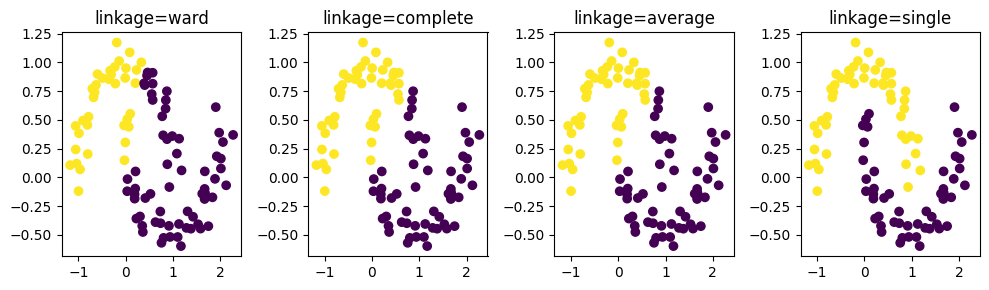

In [17]:
from sklearn.cluster import AgglomerativeClustering

# ваш код здесь
linkage_values = ['ward', 'complete', 'average', 'single']

fig = plt.figure(figsize=(10, 3))
i = 0

for linkage in linkage_values:
    agglo = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    labels = agglo.fit_predict(X)
    i += 1
    plt.subplot(1, 4, i)
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(f'linkage={linkage}')
plt.tight_layout()
plt.show()

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

**Ответ: n_neighbors=5**

/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


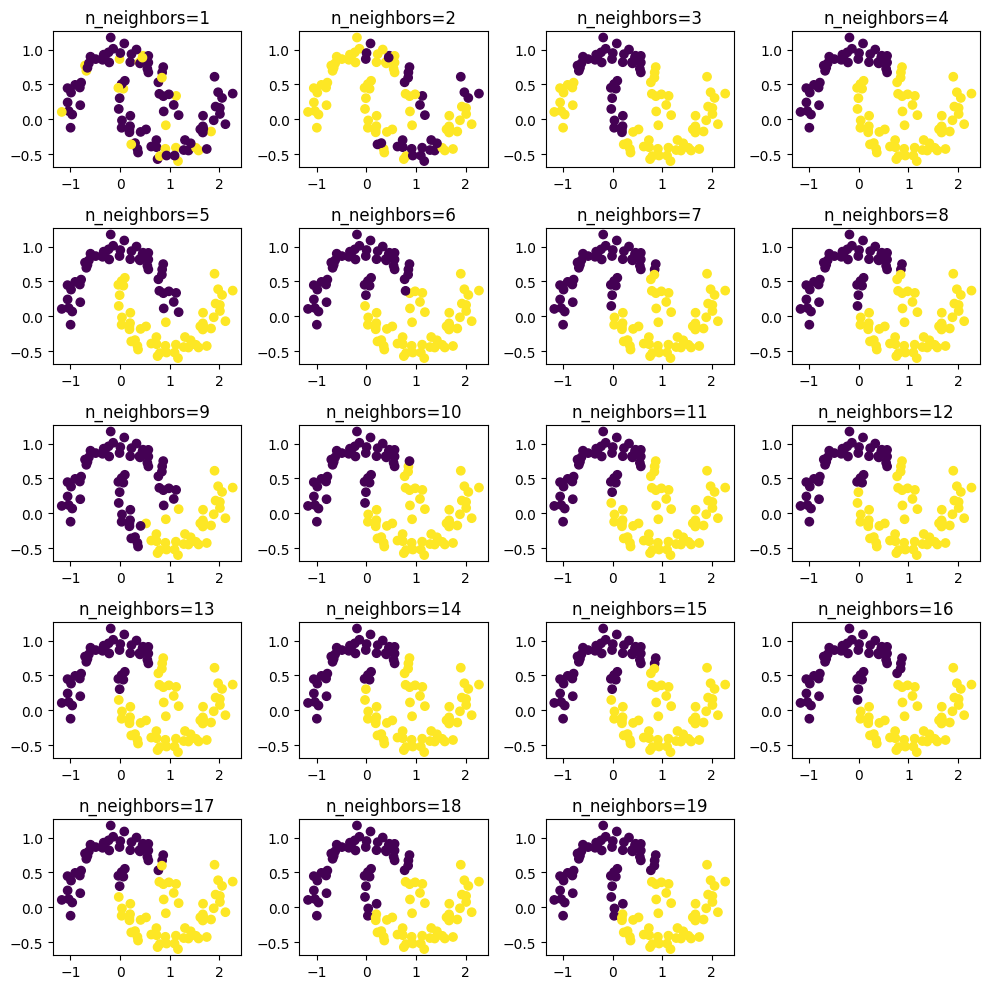

In [18]:
# ваш код здесь
from sklearn.cluster import SpectralClustering

n_neighbors_values = list(range(1, 20))

fig = plt.figure(figsize=(10, 10))

for n_neighbors in n_neighbors_values:
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42, n_neighbors=n_neighbors)
    labels = spectral.fit_predict(X)
    plt.subplot(5, 4, n_neighbors)
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(f'n_neighbors={n_neighbors}')
plt.tight_layout()

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

**Ответ:**
- лучшие - DBSCAN и AgglomerativeClustering
- по времени - на таком объеме данных все быстрые, явного лидера нет